In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os
from pathlib import Path

In [4]:
# Set display options for better visualization
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [5]:
# Define the path to the CSV files
base_path = Path('../../data/raw')

# List all CSV files in the directory
df1 = pd.read_csv(base_path / 'optitrack_data_calibration_x.csv')
df2 = pd.read_csv(base_path / 'optitrack_data_calibration_y.csv')


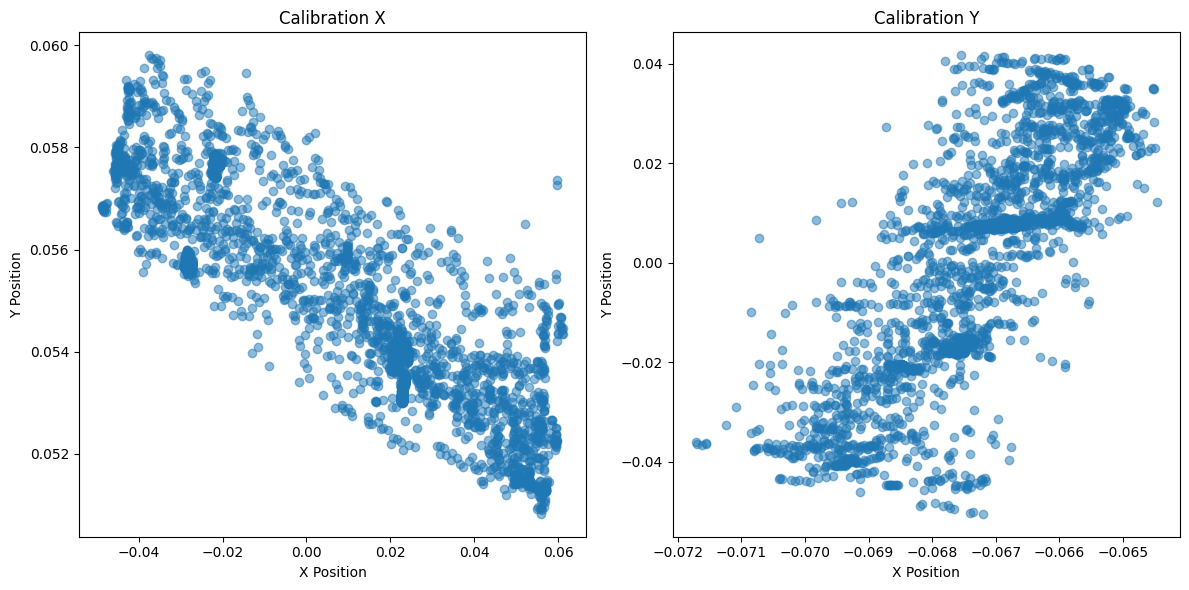

In [6]:
# Create a simple visualization
plt.figure(figsize=(12, 6))

# Plot Dataset 1
plt.subplot(121)
plt.scatter(df1['x'], df1['y'], alpha=0.5)
plt.title('Calibration X')
plt.xlabel('X Position')
plt.ylabel('Y Position')

# Plot Dataset 2
plt.subplot(122)
plt.scatter(df2['x'], df2['y'], alpha=0.5)
plt.title('Calibration Y')
plt.xlabel('X Position')
plt.ylabel('Y Position')

plt.tight_layout()
plt.show()

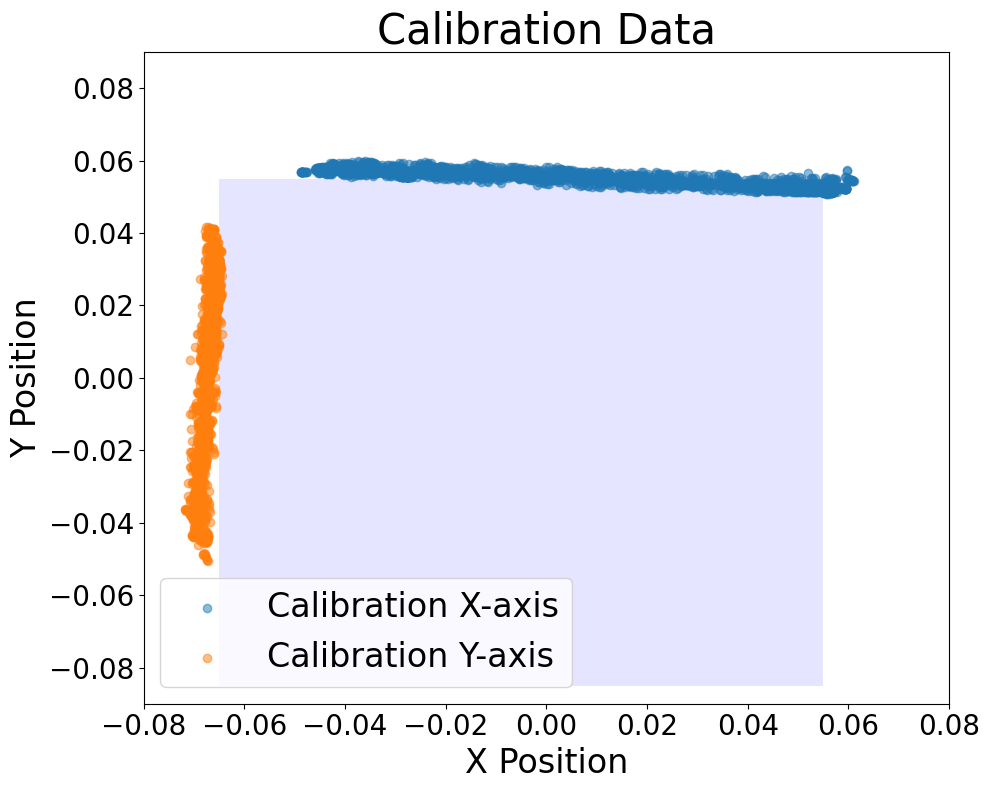

In [29]:
# Create a single visualization
plt.figure(figsize=(10, 8))

# Add blue rectangle for the bounds (-0.06 to 0.06, -0.07 to 0.07)
rect = plt.Rectangle((-0.065, -0.085), 0.12, 0.14, 
                    facecolor='blue', alpha=0.1)
plt.gca().add_patch(rect)

# Plot both datasets on the same graph
plt.scatter(df1['x'], df1['y'], alpha=0.5, label='Calibration X-axis')
plt.scatter(df2['x'], df2['y'], alpha=0.5, label='Calibration Y-axis')

# Add labels and title
plt.title('Calibration Data', fontsize=30)
plt.xlabel('X Position', fontsize=24)
plt.ylabel('Y Position', fontsize=24)

# Set axis limits to show the full rectangle
plt.xlim(-0.08, 0.08)  # Slightly larger than rectangle to show boundaries
plt.ylim(-0.09, 0.09)

# Increase tick label size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Add legend
plt.legend(fontsize=24)

# Adjust layout
plt.tight_layout()
plt.show()

In [7]:
# Perform linear regression for dataset 1
X1 = df1['x'].values.reshape(-1, 1)
y1 = df1['y'].values
reg1 = LinearRegression().fit(X1, y1)
slope1 = reg1.coef_[0]
intercept1 = reg1.intercept_

# Perform linear regression for dataset 2
X2 = df2['x'].values.reshape(-1, 1)
y2 = df2['y'].values
reg2 = LinearRegression().fit(X2, y2)
slope2 = reg2.coef_[0]
intercept2 = reg2.intercept_

In [8]:
# Print regression equations
print("Line 1 equation: y = {:.4f}x + {:.4f}".format(slope1, intercept1))
print("Line 2 equation: y = {:.4f}x + {:.4f}".format(slope2, intercept2))
# Calculate R-squared scores
r2_score1 = reg1.score(X1, y1)
r2_score2 = reg2.score(X2, y2)
print("\nR-squared scores:")
print(f"Line 1: {r2_score1:.4f}")
print(f"Line 2: {r2_score2:.4f}")

Line 1 equation: y = -0.0524x + 0.0550
Line 2 equation: y = 14.6664x + 0.9863

R-squared scores:
Line 1: 0.7108
Line 2: 0.7078


In [9]:
# Find intersection point
# Solve: slope1 * x + intercept1 = slope2 * x + intercept2
x_intersection = (intercept2 - intercept1) / (slope1 - slope2)
y_intersection = slope1 * x_intersection + intercept1

print("\nIntersection point:")
print(f"x = {x_intersection:.4f}")
print(f"y = {y_intersection:.4f}")


Intersection point:
x = -0.0633
y = 0.0583


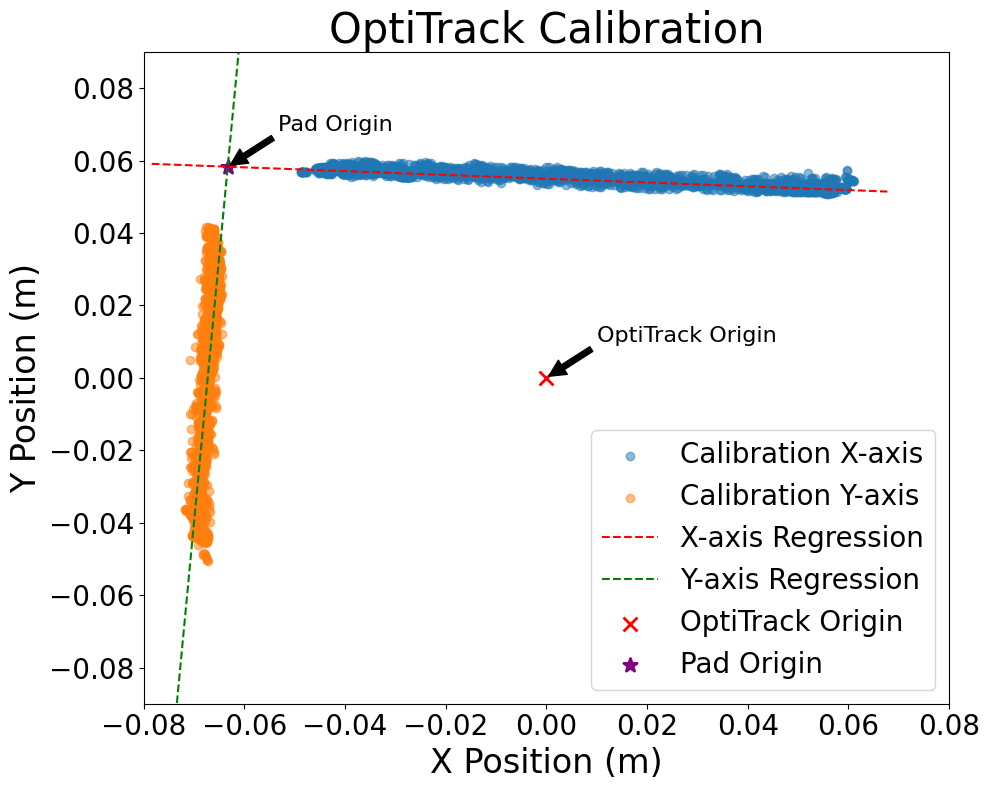

In [ ]:
# Create a single visualization
plt.figure(figsize=(10, 8))


# Plot both datasets on the same graph
plt.scatter(df1['x'], df1['y'], alpha=0.5, label='Calibration X-axis')
plt.scatter(df2['x'], df2['y'], alpha=0.5, label='Calibration Y-axis')

# Add regression lines
x_range = np.linspace(plt.xlim()[0], plt.xlim()[1], 100)
plt.plot(x_range, slope1 * x_range + intercept1, '--', color='red', 
         label=f'X-axis Regression')
plt.plot(x_range, slope2 * x_range + intercept2, '--', color='green',
         label=f'Y-axis Regression')

# Add and label the OptiTrack origin point
plt.scatter(0, 0, color='red', s=100, marker='x', linewidth=2, label='OptiTrack Origin')
plt.annotate('OptiTrack Origin', 
            xy=(0, 0), 
            xytext=(0.01, 0.01),
            fontsize=16,
            arrowprops=dict(facecolor='black', shrink=0.05))

# Add and label the intersection point (Pad origin)
plt.scatter(x_intersection, y_intersection, color='purple', s=100, marker='*', linewidth=2, 
           label=f'Pad Origin')
plt.annotate('Pad Origin', 
            xy=(x_intersection, y_intersection),
            xytext=(x_intersection + 0.01, y_intersection + 0.01),
            fontsize=16,
            arrowprops=dict(facecolor='black', shrink=0.05))

# Add labels and title
plt.title('OptiTrack Calibration', fontsize=30)
plt.xlabel('X Position (m)', fontsize=24)
plt.ylabel('Y Position (m)', fontsize=24)

# Set axis limits to show the full rectangle
plt.xlim(-0.08, 0.08)  # Slightly larger than rectangle to show boundaries
plt.ylim(-0.09, 0.09)

# Increase tick label size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Add legend
plt.legend(fontsize=20, loc='best')

# Adjust layout
plt.tight_layout()

#plt.savefig('../../img/optitrack_calibration.png', dpi=600, bbox_inches='tight', format='png')

plt.show()